In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# Set the path to the train and test directories
train_data_dir = 'D:/data_split/train'
test_data_dir = 'D:/data_split/test'

# Set the number of classes and image dimensions
num_classes = 13
image_size = (96, 96)
batch_size = 8
class_names = [
    'Andorra_2019',
    'Common',
    'Lithuania_2021',
    'Monaco_2015',
    'Monaco_2016',
    'Monaco_2017',
    'Monaco_2018',
    'Monaco_2019',
    'SanMarino_2004',
    'SanMarino_2005',
    'Vatican_2004',
    'Vatican_2005',
    'Vatican_2006'
]


# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Normalization for testing/validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for loading the train and test images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42,
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    #seed=42,
    shuffle=False
)



Found 3367 images belonging to 13 classes.
Found 830 images belonging to 13 classes.
Found 474 images belonging to 13 classes.


In [3]:
# Load the pre-trained MobileNet model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze the weights of the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Build the improved CNN model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


9406464/9406464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 256)               2949376   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                3341      
                                                                 
Total params: 5,210,701
Trainable params: 2,952,717
Non-tra

In [19]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of training and validation steps per epoch
train_steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps_per_epoch = validation_generator.n // validation_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch
)

# Evaluate the model on the test dataset
test_steps_per_epoch = test_generator.n // test_generator.batch_size
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
420/420 [==============================] - 53s 115ms/step - loss: 0.1545 - accuracy: 0.9586 - val_loss: 0.9741 - val_accuracy: 0.9454
Epoch 2/10
420/420 [==============================] - 47s 112ms/step - loss: 0.1697 - accuracy: 0.9583 - val_loss: 1.0331 - val_accuracy: 0.9357
Epoch 3/10
420/420 [==============================] - 47s 112ms/step - loss: 0.1572 - accuracy: 0.9622 - val_loss: 0.7658 - val_accuracy: 0.9272
Epoch 4/10
420/420 [==============================] - 47s 112ms/step - loss: 0.1831 - accuracy: 0.9542 - val_loss: 1.0463 - val_accuracy: 0.9345
Epoch 5/10
420/420 [==============================] - 48s 114ms/step - loss: 0.1742 - accuracy: 0.9524 - val_loss: 1.1983 - val_accuracy: 0.9381
Epoch 6/10
420/420 [==============================] - 50s 119ms/step - loss: 0.1505 - accuracy: 0.9577 - val_loss: 0.9115 - val_accuracy: 0.9357
Epoch 7/10
420/420 [==============================] - 50s 118ms/step - loss: 0.0922 - accuracy: 0.9684 - val_loss: 1.1749 - val_ac

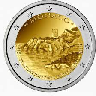

In [12]:
img = tf.keras.preprocessing.image.load_img('D:/8.jpg', target_size=(96, 96))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [13]:
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 132ms/step
[[0.0000000e+00 1.0000000e+00 3.5435524e-10 9.1103196e-15 1.0758108e-37
  7.2759698e-15 1.4018774e-19 0.0000000e+00 0.0000000e+00 9.7573491e-19
  1.2953974e-19 2.7258029e-35 0.0000000e+00]]


In [14]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

# transform classes number into classes name
class_names[class_id.item()]

[1]


'Common'

60/60 [==============================] - 11s 105ms/step


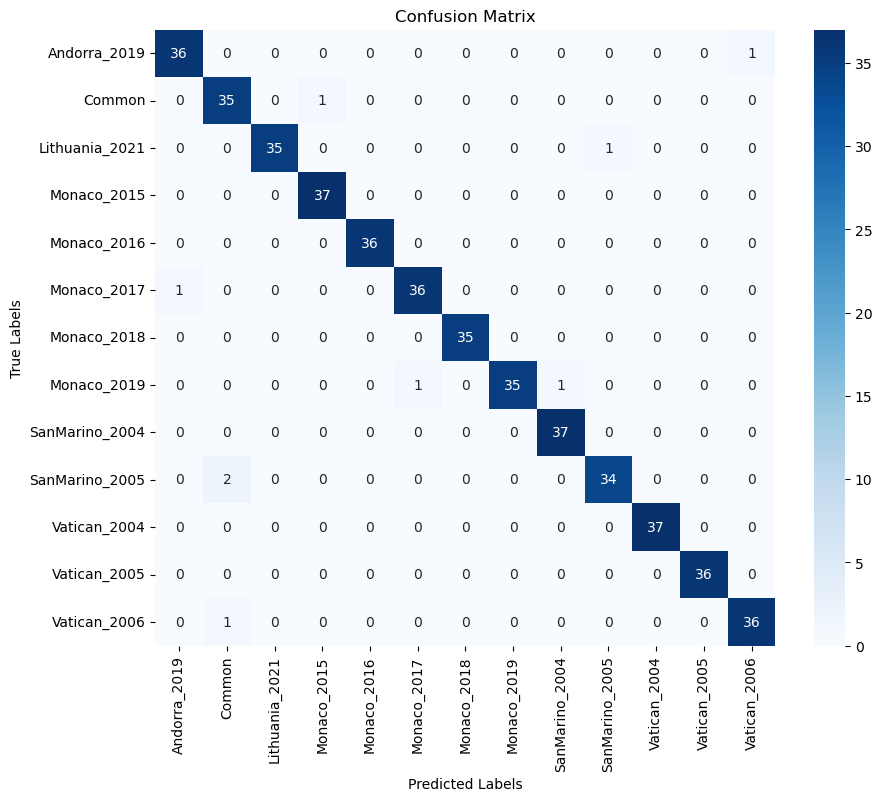

In [15]:
# Get the true labels for the test set
test_true_labels = test_generator.classes

# Predict the labels for the test set
test_pred_probs = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
#saving model
model.save('C:/Users/spoor/Documents/Jupyter-works/mobilenetv2_model_98/mobilenetv2_model_98.h5')

model.save_weights('C:/Users/spoor/Documents/Jupyter-works/mobilenetv2_model_98/mobilenetv2_model_98_weights.h5')